# p07: Accuracy of periodic spectral differentiation

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from numpy import zeros,pi,inf,linspace,arange,tan,sin,cos,exp,abs,dot
from scipy.linalg import toeplitz,norm
from matplotlib.pyplot import figure,subplot,semilogy,title,xlabel,ylabel,axis

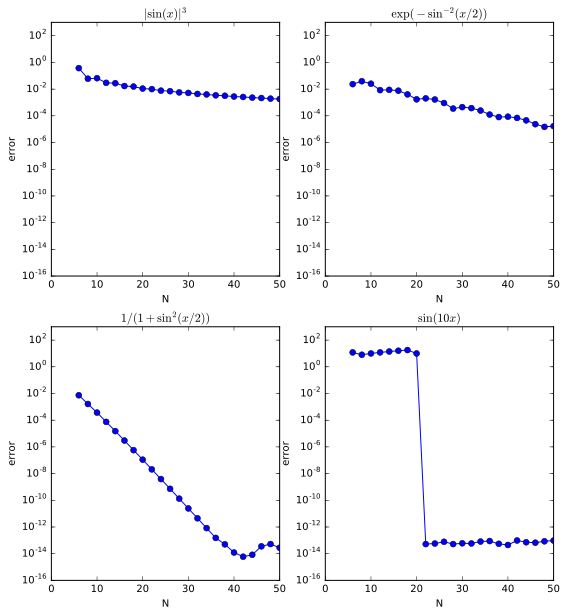

In [4]:
# Set up grid and differentiation matrix:
Nmax = 50
E = zeros((4,Nmax/2-2))
for N in range(6,Nmax+1,2):
    h = 2.0*pi/N; x = h*linspace(1,N,N);
    col = zeros(N)
    col[1:] = 0.5*(-1.0)**arange(1,N)/tan(arange(1,N)*h/2.0)
    row = zeros(N)
    row[0] = col[0]
    row[1:] = col[N-1:0:-1]
    D = toeplitz(col,row)
    
    v = abs(sin(x))**3
    vprime = 3.0*sin(x)*cos(x)*abs(sin(x))
    E[0][N/2-3] = norm(dot(D,v)-vprime,inf)
    
    v = exp(-sin(x/2)**(-2))   # C-infinity
    vprime = 0.5*v*sin(x)/sin(x/2)**4
    E[1][N/2-3] = norm(dot(D,v)-vprime,inf)
    
    v = 1.0/(1.0+sin(x/2)**2)     # analytic in a strip
    vprime = -sin(x/2)*cos(x/2)*v**2
    E[2][N/2-3] = norm(dot(D,v)-vprime,inf)
    
    v = sin(10*x)
    vprime = 10*cos(10*x)   # band-limited
    E[3][N/2-3] = norm(dot(D,v)-vprime,inf)


titles = ["$|\sin(x)|^3$", "$\exp(-\sin^{-2}(x/2))$", \
          "$1/(1+\sin^2(x/2))$", "$\sin(10x)$"]
figure(figsize=(9,10))
for iplot in range(4):
    subplot(2,2,iplot+1)
    semilogy(arange(6,Nmax+1,2),E[iplot][:],'o-')
    title(titles[iplot])
    xlabel('N')
    ylabel('error')
    axis([0,Nmax,1.0e-16,1.0e3])